In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [125]:
 
df_bid = pd.read_csv('EURGBP_5 Mins_Bid_2024.01.01_2024.01.31-2.csv')
df_ask = pd.read_csv('EURGBP_5 Mins_Ask_2024.01.01_2024.01.31-2.csv')

In [127]:
df_bid

,Time (UTC),Open,High,Low,Close,Volume
0,2024.01.01 22:00:00,0.86692,0.86692,0.86692,0.86692,0.90
1,2024.01.01 22:05:00,0.86705,0.86725,0.86705,0.86709,7.15
2,2024.01.01 22:10:00,0.86720,0.86725,0.86709,0.86725,42.76
3,2024.01.01 22:15:00,0.86725,0.86749,0.86714,0.86749,16.76
4,2024.01.01 22:20:00,0.86742,0.86766,0.86729,0.86743,123.00
...,...,...,...,...,...,...
6355,2024.01.31 23:35:00,0.85222,0.85223,0.85218,0.85218,32.87
6356,2024.01.31 23:40:00,0.85219,0.85223,0.85215,0.85216,24.00
6357,2024.01.31 23:45:00,0.85216,0.85222,0.85214,0.85220,100.80
6358,2024.01.31 23:50:00,0.85221,0.85221,0.85211,0.85215,96.52


In [128]:
df_ask

,Time (UTC),Open,High,Low,Close,Volume
0,2024.01.01 22:00:00,0.86901,0.86901,0.86901,0.86901,0.90
1,2024.01.01 22:05:00,0.86872,0.86883,0.86865,0.86880,8.50
2,2024.01.01 22:10:00,0.86877,0.86877,0.86849,0.86855,36.29
3,2024.01.01 22:15:00,0.86855,0.86855,0.86838,0.86838,18.60
4,2024.01.01 22:20:00,0.86833,0.86852,0.86804,0.86819,141.05
...,...,...,...,...,...,...
6355,2024.01.31 23:35:00,0.85229,0.85233,0.85228,0.85229,33.27
6356,2024.01.31 23:40:00,0.85230,0.85230,0.85223,0.85223,29.40
6357,2024.01.31 23:45:00,0.85224,0.85230,0.85224,0.85230,106.13
6358,2024.01.31 23:50:00,0.85227,0.85228,0.85221,0.85224,79.20


In [129]:
df = df_bid.merge(df_ask, on='Time (UTC)', how='outer')

In [133]:
df.head()

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2024.01.01 22:00:00,0.86692,0.86692,0.86692,0.86692,0.90,0.86901,0.86901,0.86901,0.86901,0.90
1,2024.01.01 22:05:00,0.86705,0.86725,0.86705,0.86709,7.15,0.86872,0.86883,0.86865,0.86880,8.50
2,2024.01.01 22:10:00,0.86720,0.86725,0.86709,0.86725,42.76,0.86877,0.86877,0.86849,0.86855,36.29
3,2024.01.01 22:15:00,0.86725,0.86749,0.86714,0.86749,16.76,0.86855,0.86855,0.86838,0.86838,18.60
4,2024.01.01 22:20:00,0.86742,0.86766,0.86729,0.86743,123.00,0.86833,0.86852,0.86804,0.86819,141.05


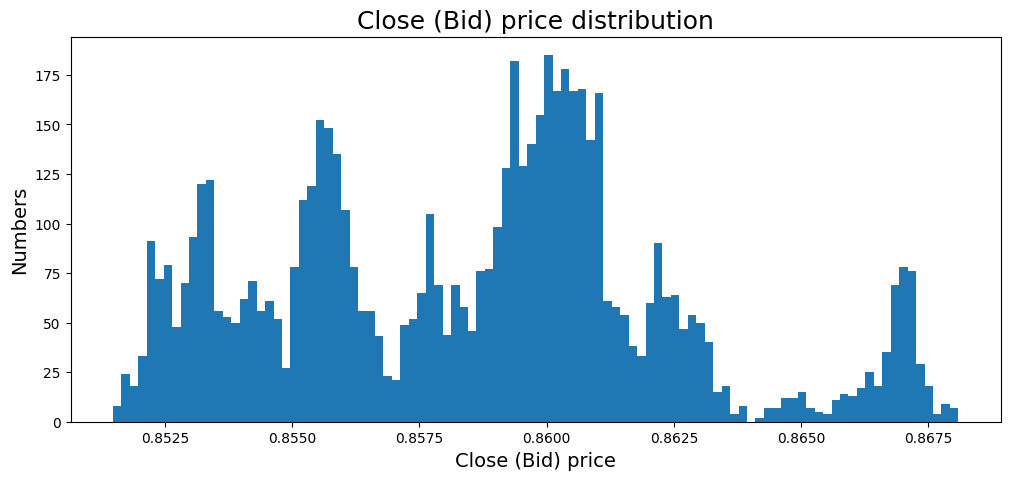

In [134]:
plt.figure(num=1,figsize=(12,5))
plt.hist(df['Close_x'],bins=100)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14);

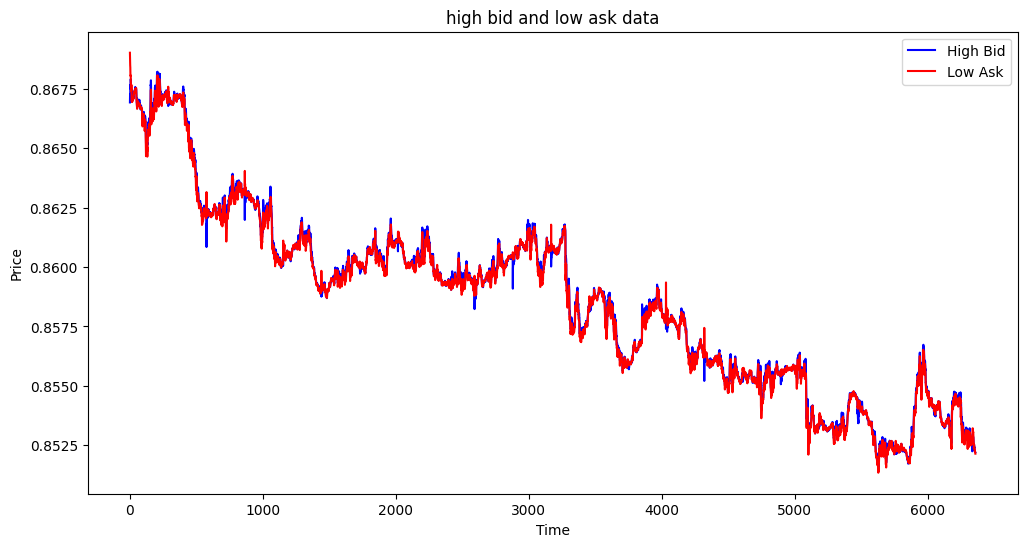

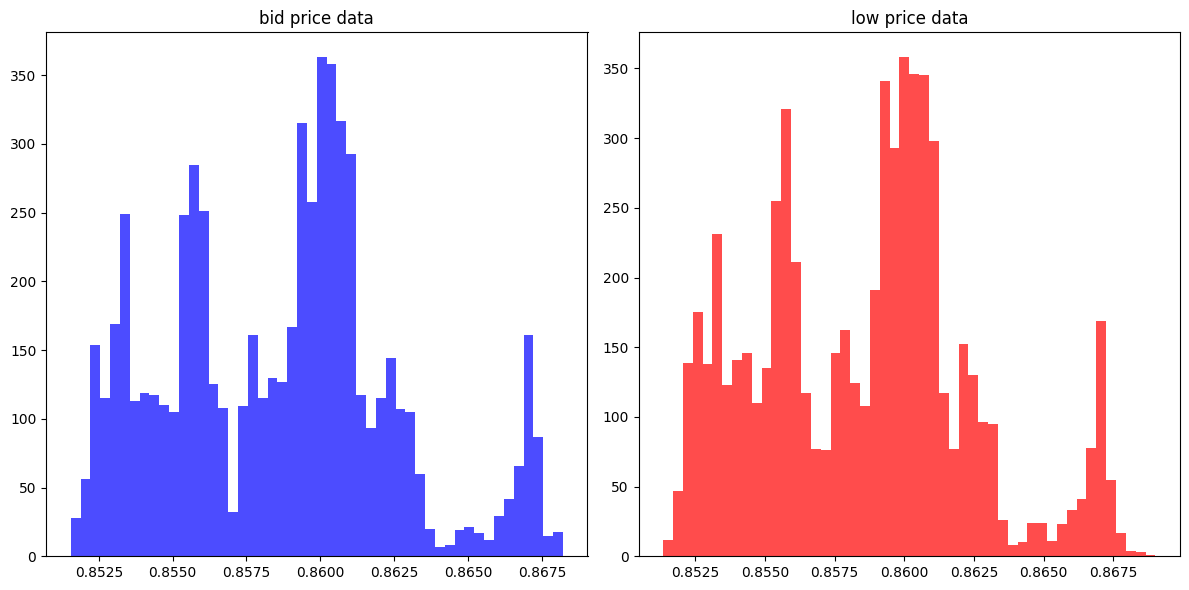

In [135]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High_x'], label='High Bid', color='blue')
plt.plot(df.index, df['Low_y'], label='Low Ask', color='red')
plt.title('high bid and low ask data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['High_x'], bins=50, color='blue', alpha=0.7)
plt.title('bid price data')

plt.subplot(1, 2, 2)
plt.hist(df['Low_y'], bins=50, color='red', alpha=0.7)
plt.title('low price data')

plt.tight_layout()
plt.show()


In [136]:
df.columns

Index(['Time (UTC)', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume _x',
       'Open_y', 'High_y', 'Low_y', 'Close_y', 'Volume _y'],
      dtype='object')

In [138]:


# df.columns = ['Open _x', 'High _x', 'Low _x', 'Close _x', 'Volume _x']

# mpf.plot(data_chart.iloc[0:70], type='candle', style='charles', title='EUR/GBP Candlestick Chart', volume=True)


In [139]:
#  target vector
def create_target(df):
    df['High_Bid_next'] = df['High_x'].shift(-1)
    df['Low_Ask_next'] = df['Low_y'].shift(-1)
    df.dropna(inplace=True) 
    return df

df = create_target(df)
df.head()


,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y,High_Bid_next,Low_Ask_next
0,2024.01.01 22:00:00,0.86692,0.86692,0.86692,0.86692,0.90,0.86901,0.86901,0.86901,0.86901,0.90,0.86725,0.86865
1,2024.01.01 22:05:00,0.86705,0.86725,0.86705,0.86709,7.15,0.86872,0.86883,0.86865,0.86880,8.50,0.86725,0.86849
2,2024.01.01 22:10:00,0.86720,0.86725,0.86709,0.86725,42.76,0.86877,0.86877,0.86849,0.86855,36.29,0.86749,0.86838
3,2024.01.01 22:15:00,0.86725,0.86749,0.86714,0.86749,16.76,0.86855,0.86855,0.86838,0.86838,18.60,0.86766,0.86804
4,2024.01.01 22:20:00,0.86742,0.86766,0.86729,0.86743,123.00,0.86833,0.86852,0.86804,0.86819,141.05,0.86749,0.86806


In [140]:
df.describe()

,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y,High_Bid_next,Low_Ask_next
count,6359.000000,6359.000000,6359.00000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000,6359.000000
mean,0.858519,0.858617,0.85842,0.858518,275.564183,0.858636,0.858733,0.858534,0.858632,265.522414,0.858614,0.858531
std,0.003826,0.003831,0.00382,0.003825,226.883691,0.003829,0.003835,0.003822,0.003827,219.013296,0.003831,0.003820
min,0.851490,0.851550,0.85125,0.851480,0.000000,0.851570,0.851630,0.851350,0.851560,0.000000,0.851550,0.851350
25%,0.855480,0.855550,0.85540,0.855480,124.365000,0.855600,0.855690,0.855530,0.855600,122.155000,0.855550,0.855530
50%,0.859080,0.859180,0.85899,0.859080,221.700000,0.859230,0.859320,0.859120,0.859220,214.240000,0.859180,0.859120
75%,0.860760,0.860830,0.86068,0.860760,363.600000,0.860870,0.860950,0.860790,0.860870,345.650000,0.860830,0.860790
max,0.868120,0.868210,0.86798,0.868090,3462.450000,0.869010,0.869010,0.869010,0.869010,3257.040000,0.868210,0.868650


In [141]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume _x', 'Open_y', 'High_y', 'Low_y', 'Close_y', 'Volume _y']])


scaled_df = pd.DataFrame(scaled_data, columns=['Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume_x', 'Open_y', 'High_y', 'Low_y', 'Close_y', 'Volume_y'])
scaled_df['High_Bid_next'] = df['High_Bid_next'].values
scaled_df['Low_Ask_next'] = df['Low_Ask_next'].values


In [142]:
train_size = int(len(scaled_df) * 0.9)
train_data = scaled_df[:train_size]
test_data = scaled_df[train_size:]

X_train = train_data.drop(['High_Bid_next', 'Low_Ask_next'], axis=1).values
y_train = train_data[['High_Bid_next', 'Low_Ask_next']].values

X_test = test_data.drop(['High_Bid_next', 'Low_Ask_next'], axis=1).values
y_test = test_data[['High_Bid_next', 'Low_Ask_next']].values


In [143]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [145]:
# LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2)) 


model.compile(optimizer='adam', loss='mean_squared_error')


early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)



history = model.fit(X_train, y_train, epochs=12, batch_size=50, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/12


C:\Users\Karan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4082 - val_loss: 0.2341
Epoch 2/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0396 - val_loss: 0.1749
Epoch 3/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0241 - val_loss: 0.1170
Epoch 4/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_loss: 0.0736
Epoch 5/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054 - val_loss: 0.0473
Epoch 6/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 0.0332
Epoch 7/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0255
Epoch 8/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2989e-04 - val_loss: 0.0210
Epoch 9/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3934e-04 - val_loss: 0.0184
Epoch 10/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7554e-04 - val_loss: 0.0169
Epoch 11/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8431e-04 - val_loss: 0.0154
Epoch 12/12
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2157e-04

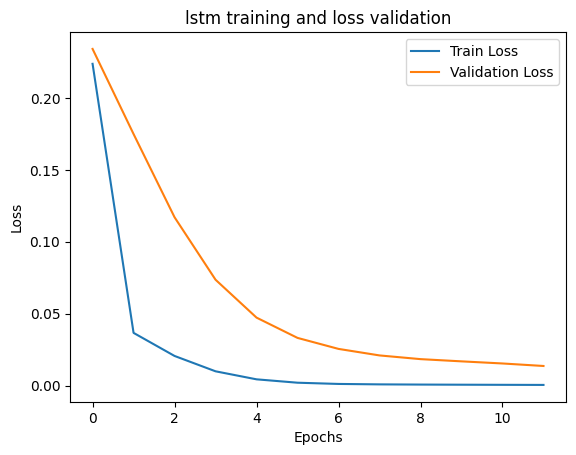

In [154]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('lstm training and loss validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [155]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error: 0.021461585255048925
Mean Absolute Error: 0.1340635368367711
